In [20]:
import umap
import pickle
import matplotlib.pyplot as plt
import sklearn.decomposition as decomposition
from sklearn.model_selection import train_test_split

In [10]:
decomposition.PCA()

PCA()

In [11]:
f = open('retina_arcface.pl','rb')

In [12]:
embs_sim,embs_affine,embs_no,embs_rot,suc_labels  = pickle.load(f)

In [41]:
def reduce_plot(emb):
    X_train, X_test, y_train, y_test = train_test_split(emb, suc_labels, test_size=0.2, random_state=42)
    pca = decomposition.PCA(n_components=100)
    pca.fit(X_train)
    emb = pca.transform(X_train)
    reducer = umap.UMAP(random_state=42)
    reducer.fit(emb,y=y_train)
    emb_reduced = reducer.transform(pca.transform(X_test))
    plt.figure(dpi=500)
    plt.scatter(emb_reduced[:,0],emb_reduced[:,1],c=y_test,cmap='Spectral', s=1)
    plt.show()

In [40]:
def reduce_plot_no_pca(emb):
    X_train, X_test, y_train, y_test = train_test_split(emb, suc_labels, test_size=0.2, random_state=42)
    reducer = umap.UMAP(random_state=42)
    reducer.fit(X_train,y=y_train)
    emb_reduced = reducer.transform(X_test)
    plt.figure(dpi=500)
    plt.scatter(emb_reduced[:,0],emb_reduced[:,1],c=y_test,cmap='Spectral', s=1)
    plt.show()

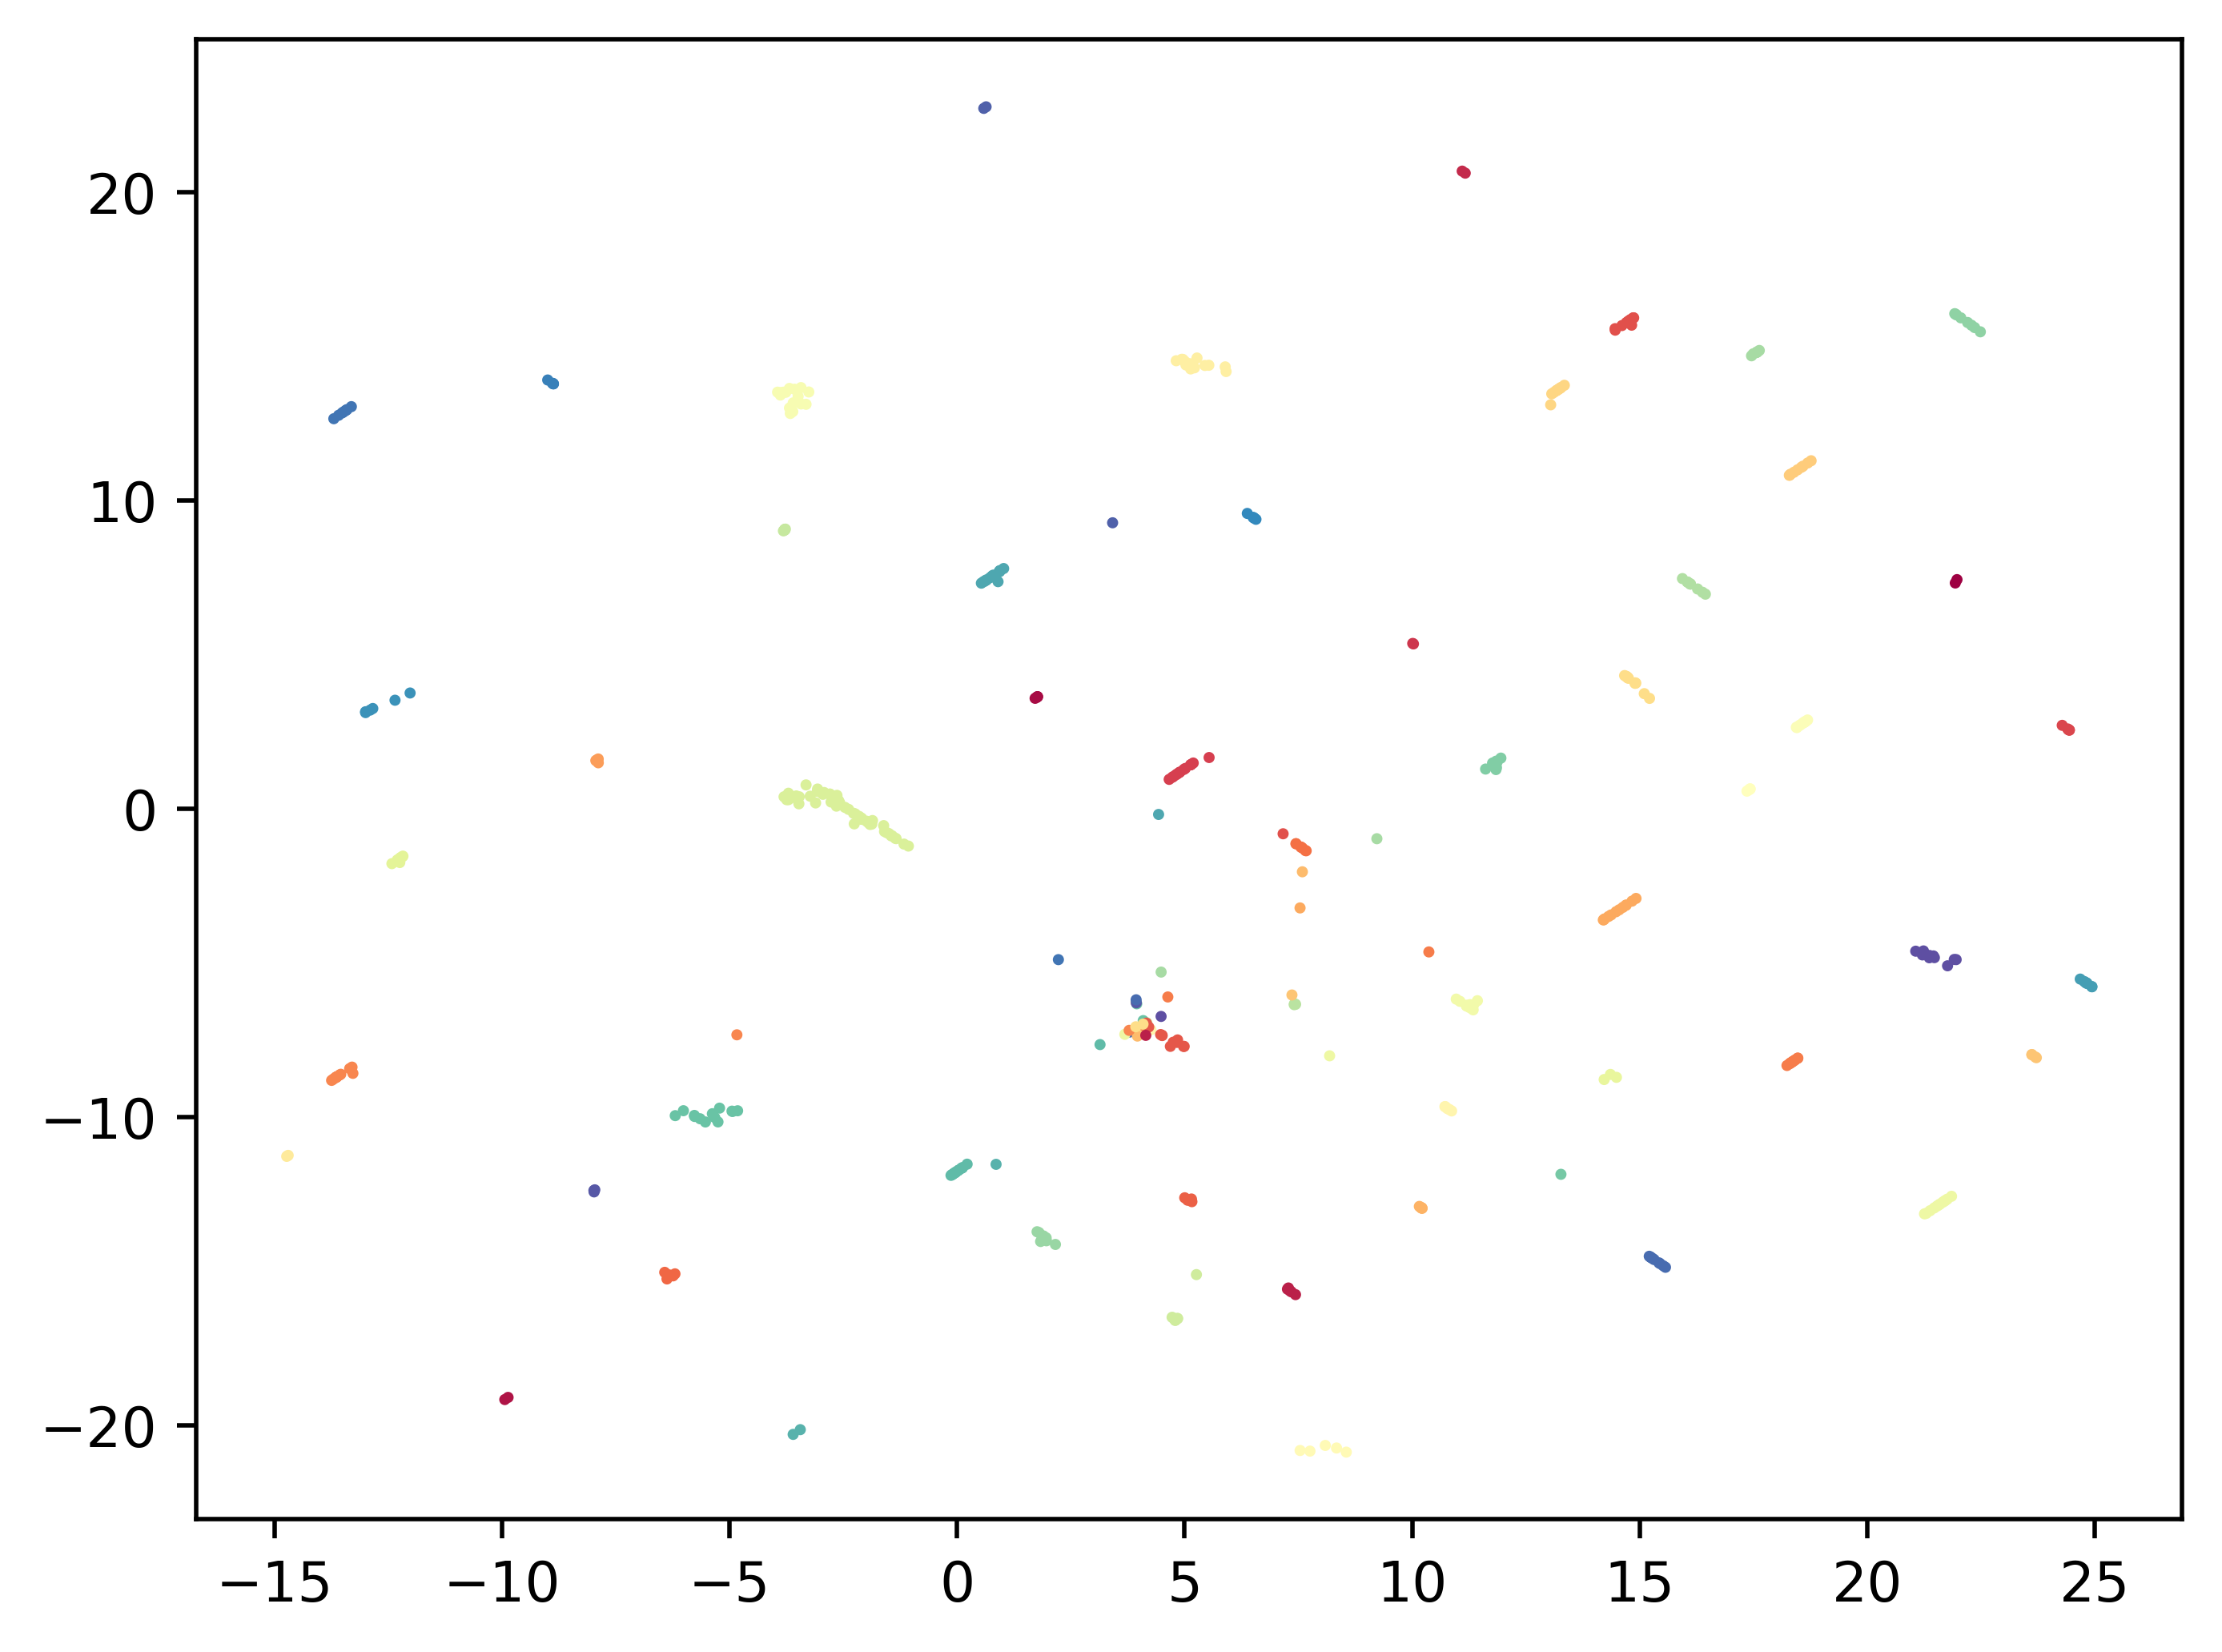

In [42]:
reduce_plot_no_pca(embs_sim)

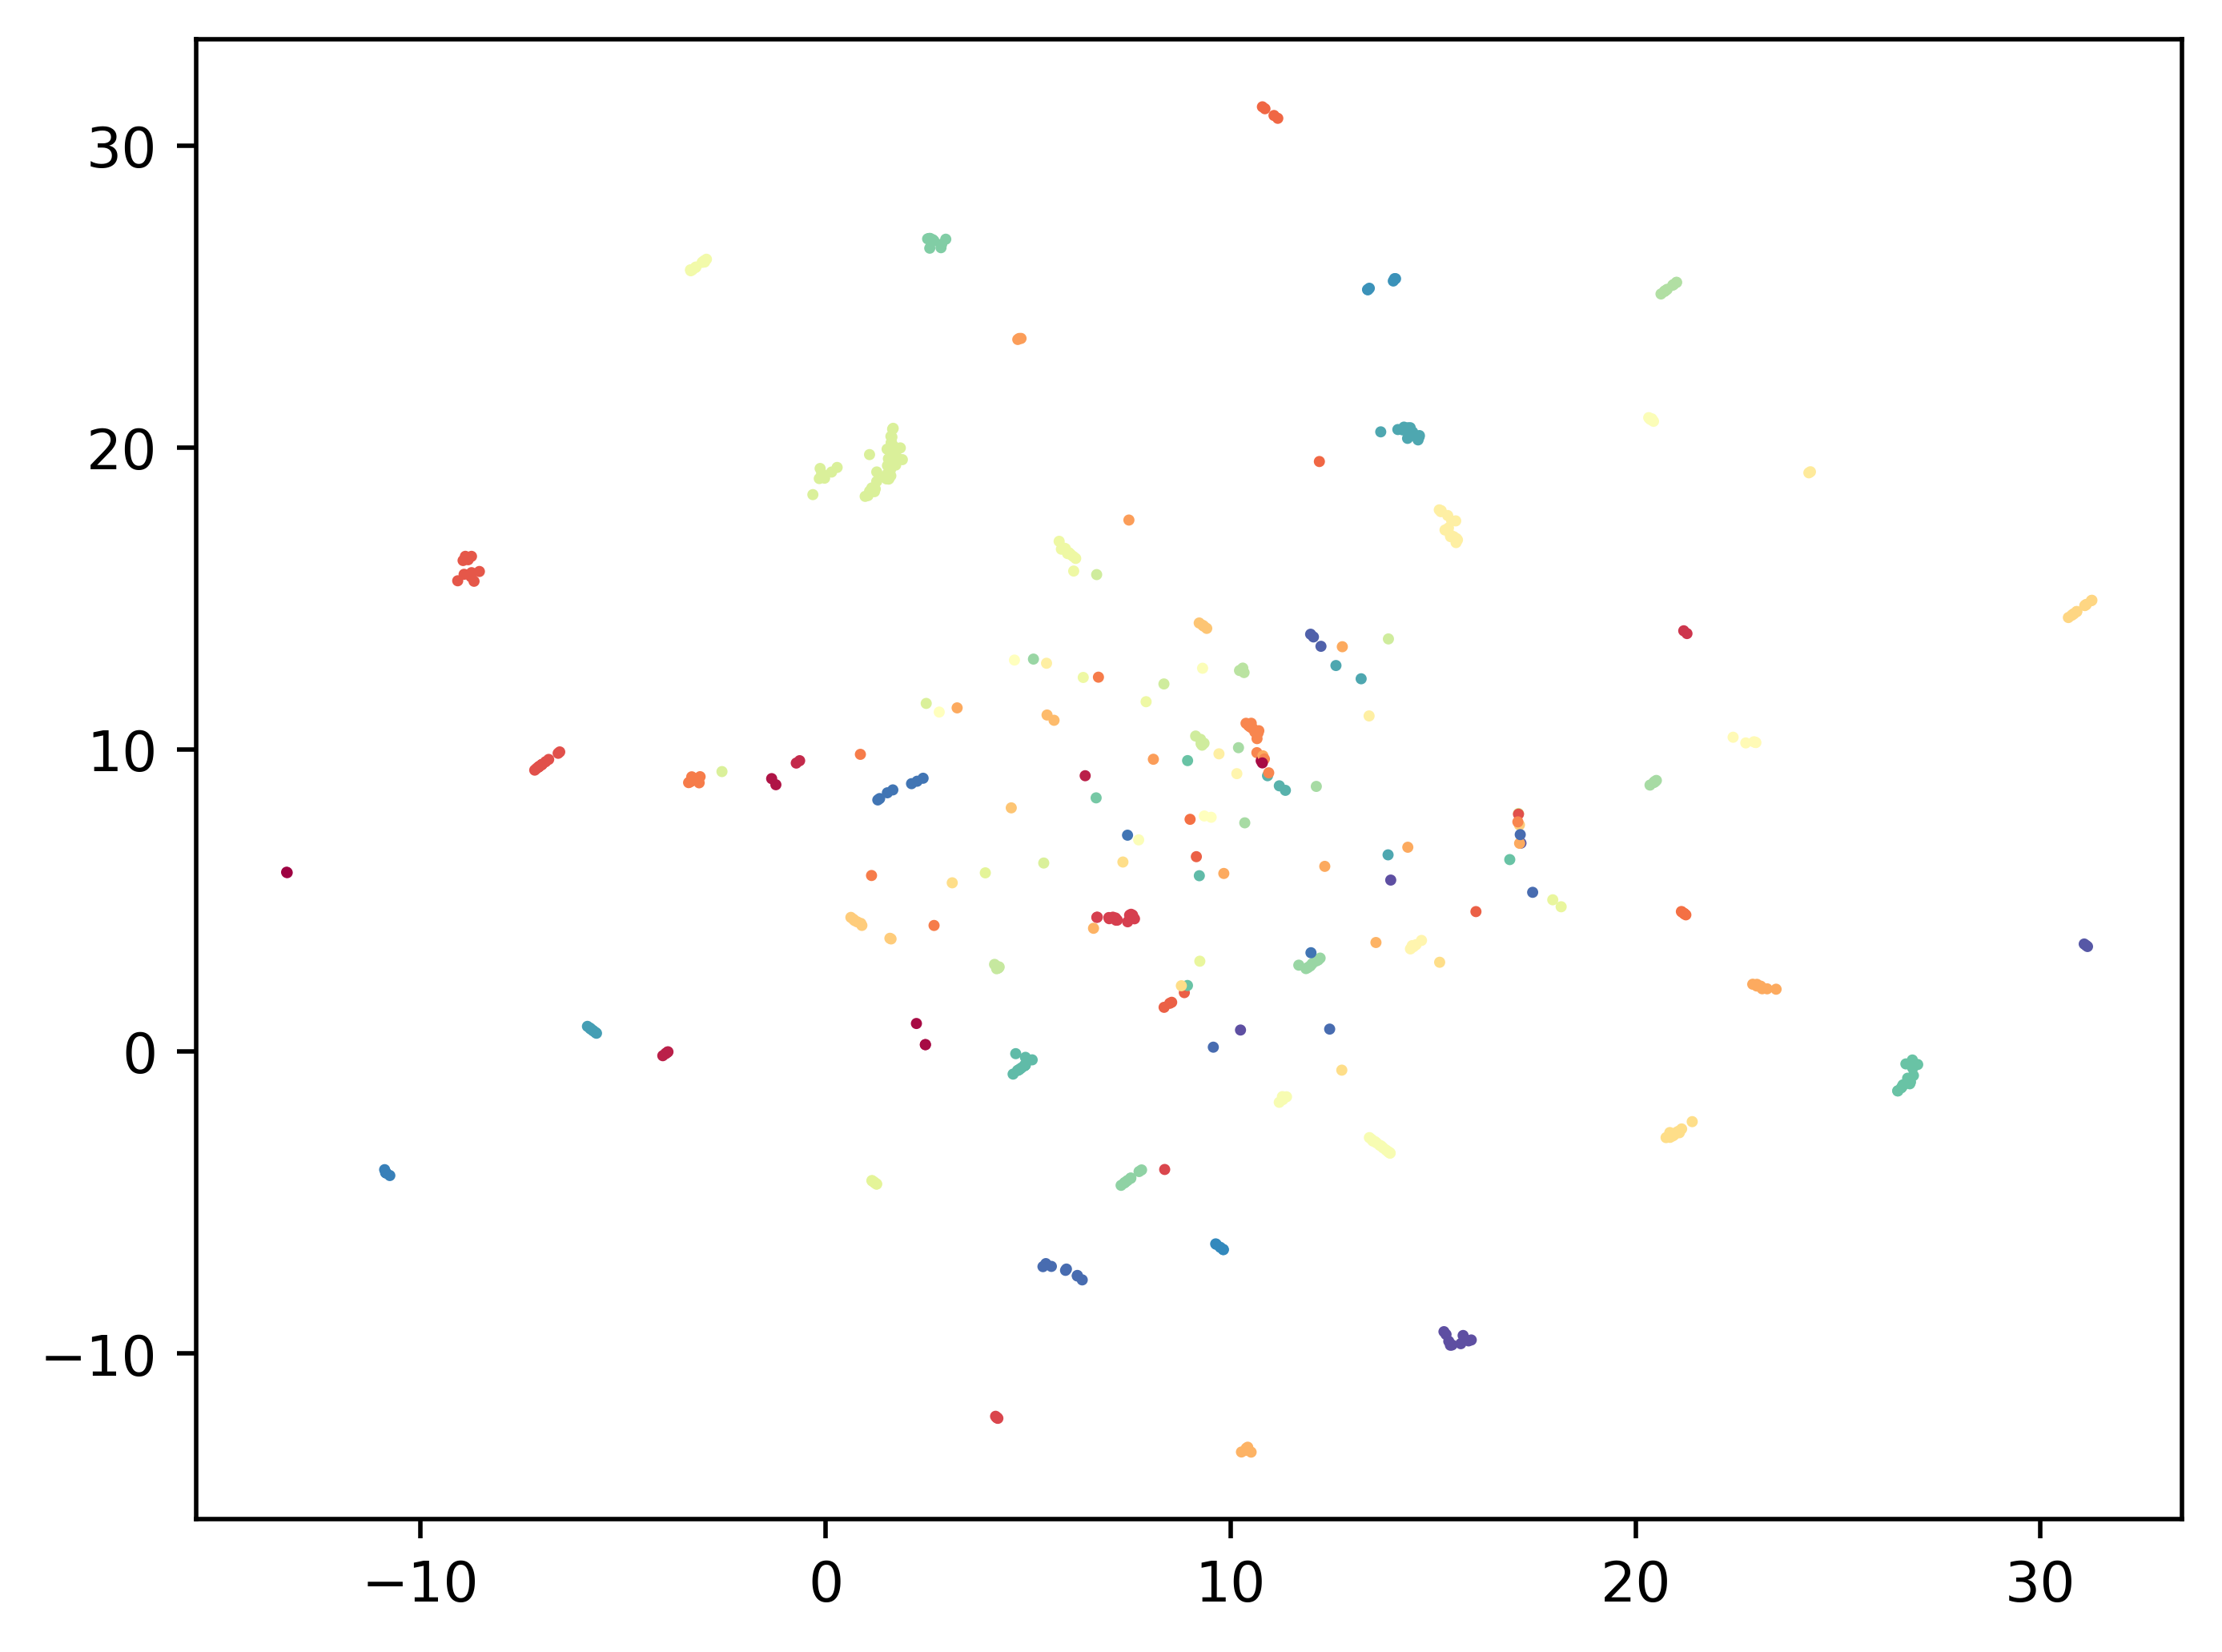

In [47]:
reduce_plot_no_pca(embs_rot)

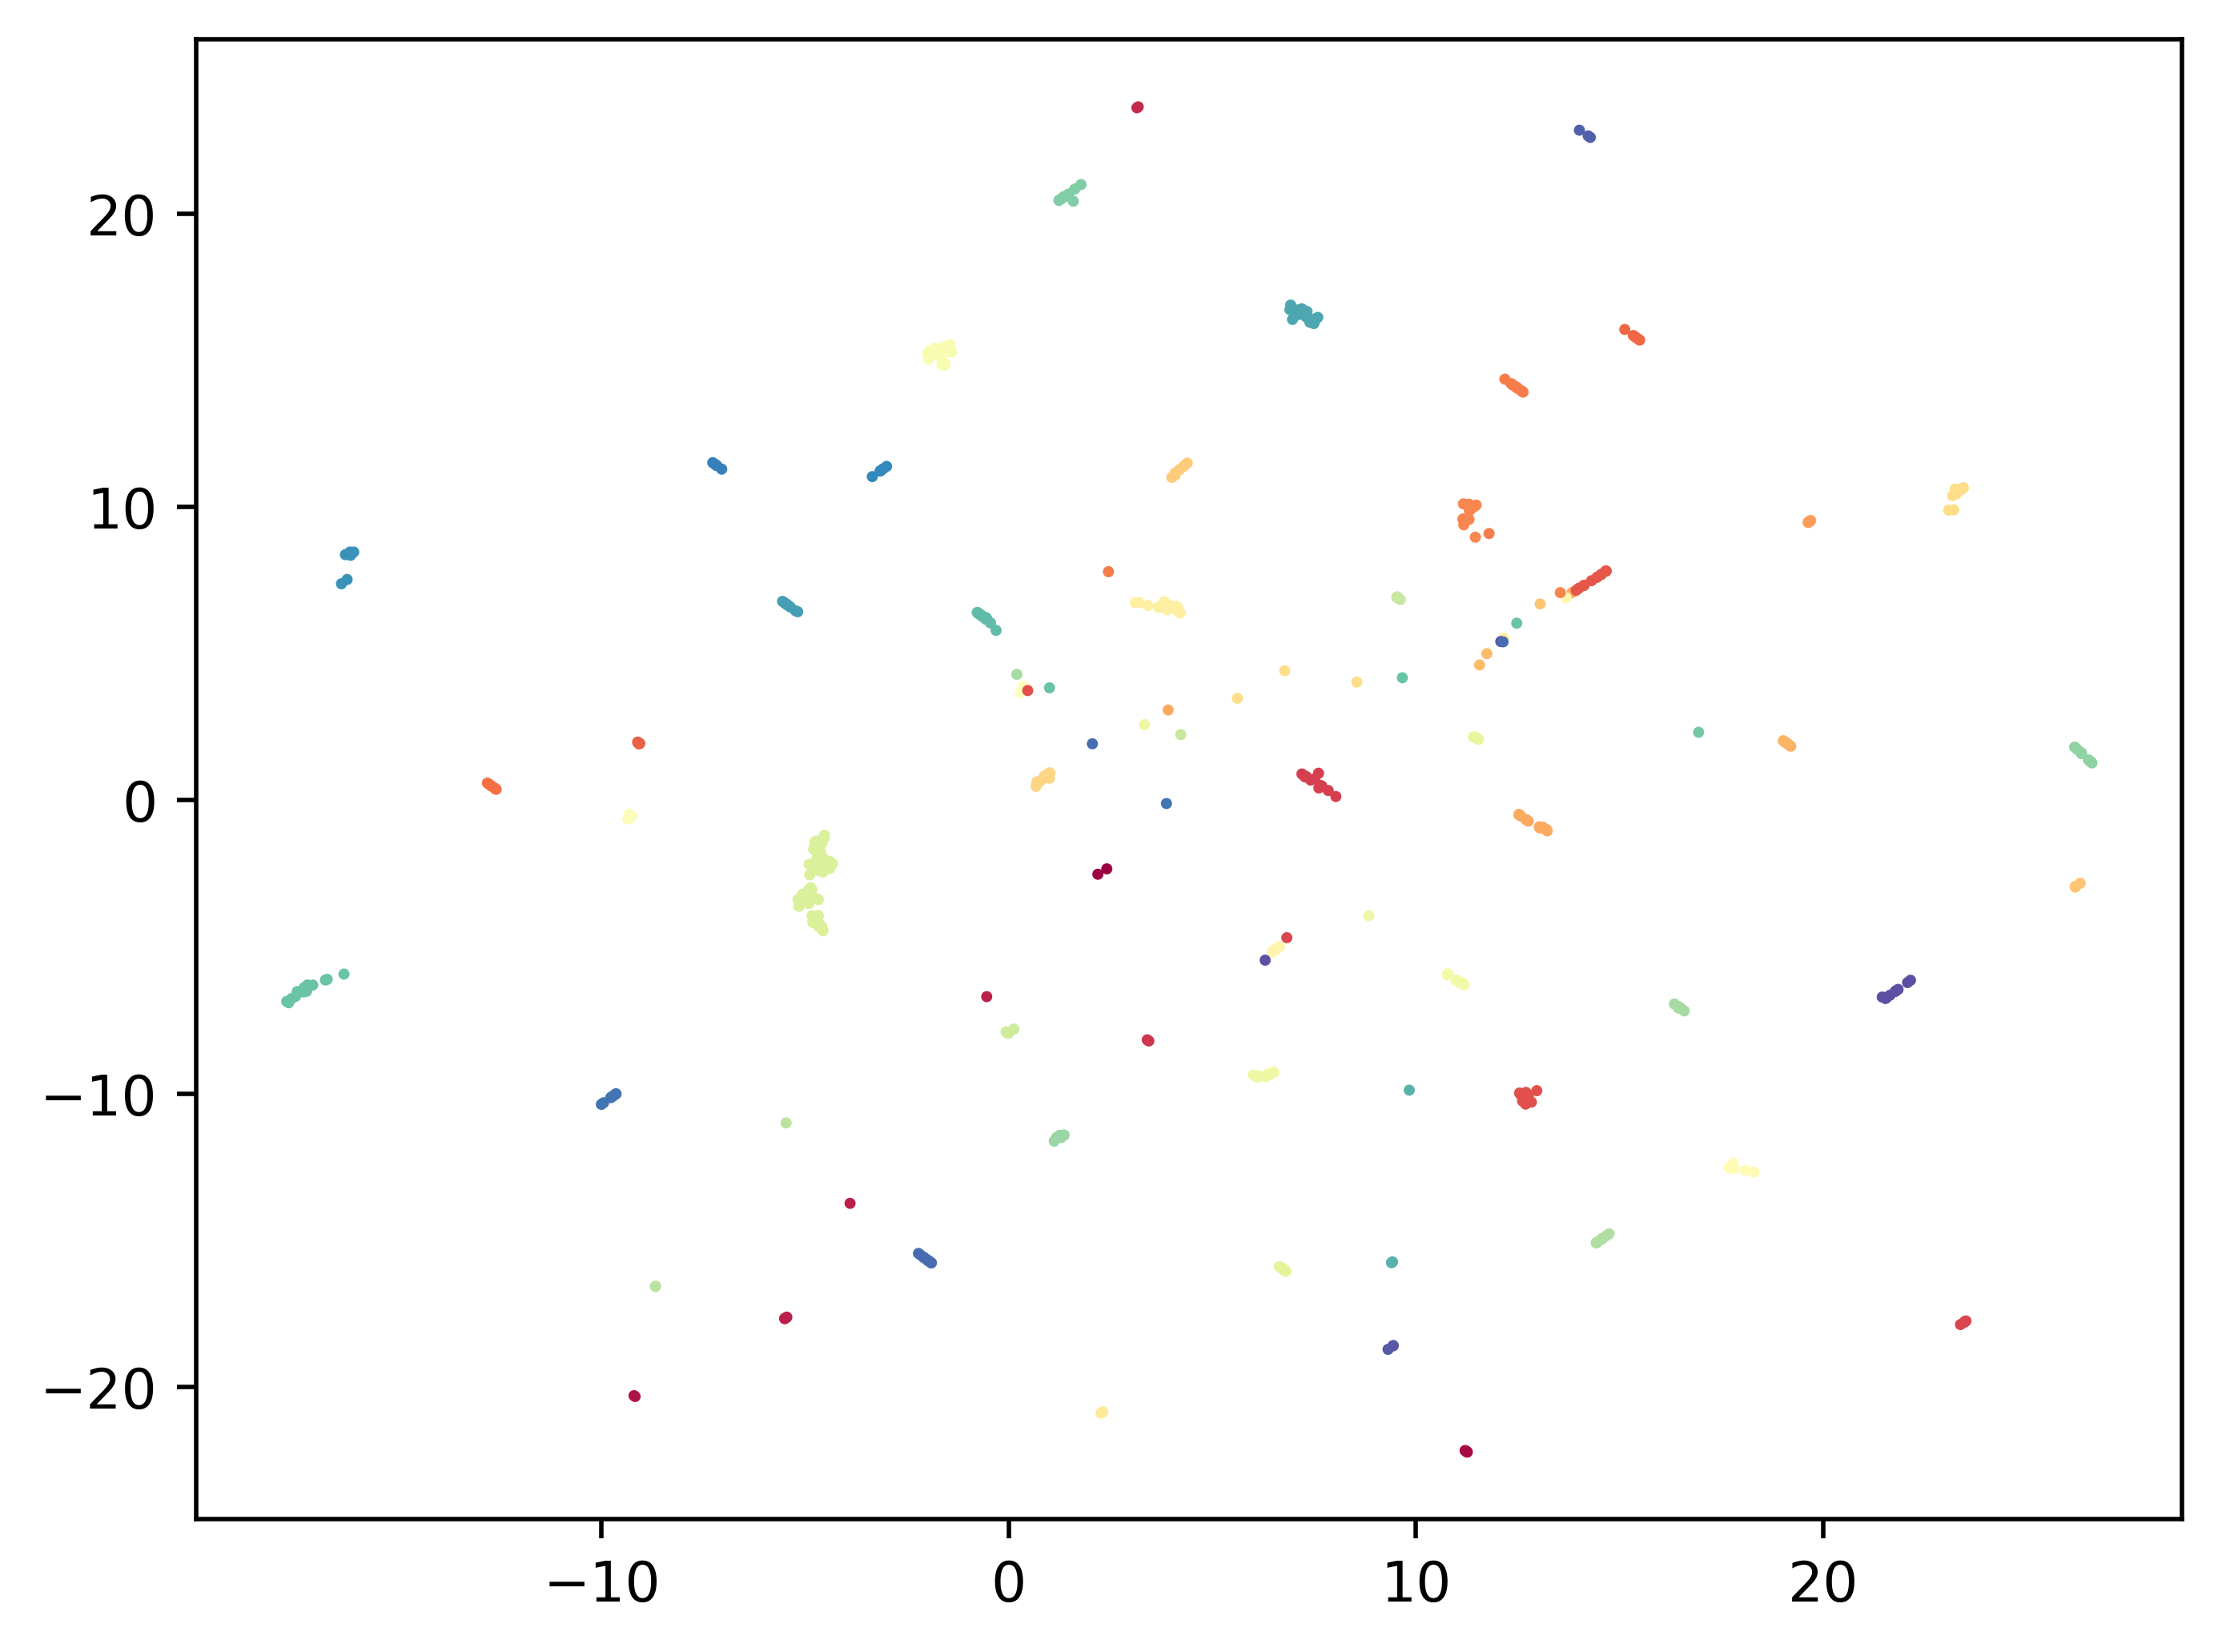

In [43]:
reduce_plot(embs_sim)

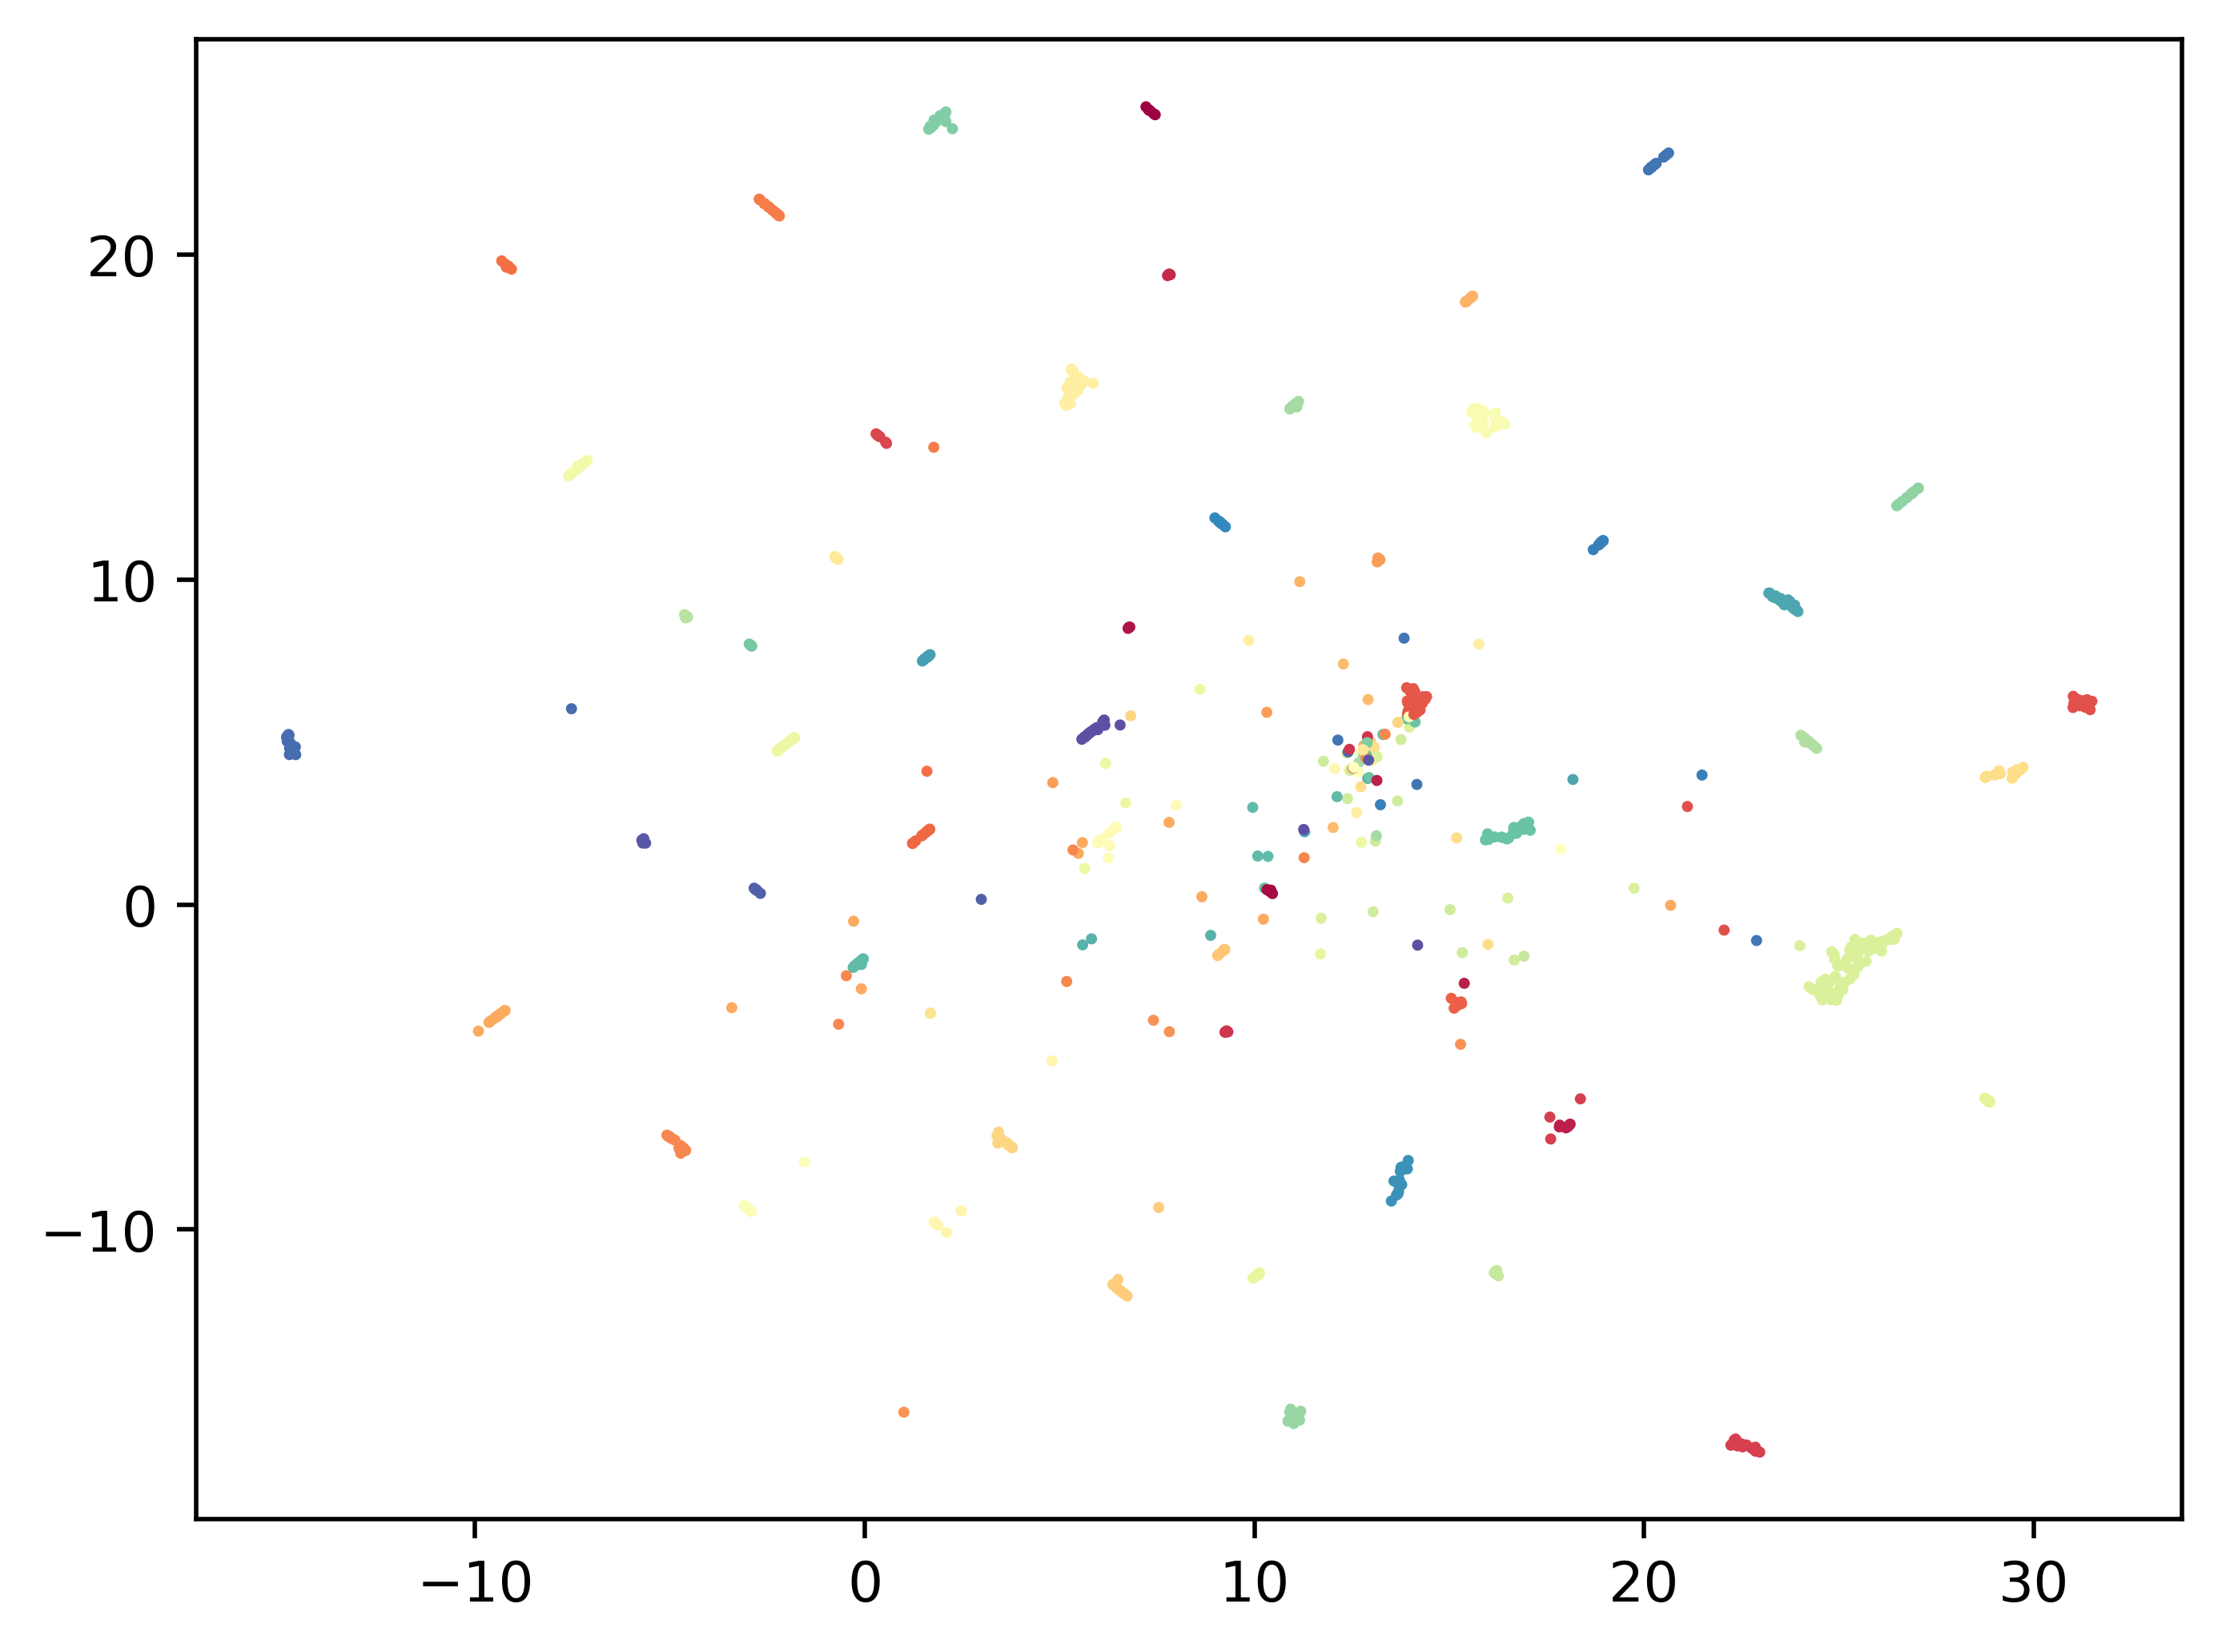

In [28]:
reduce_plot(embs_affine)

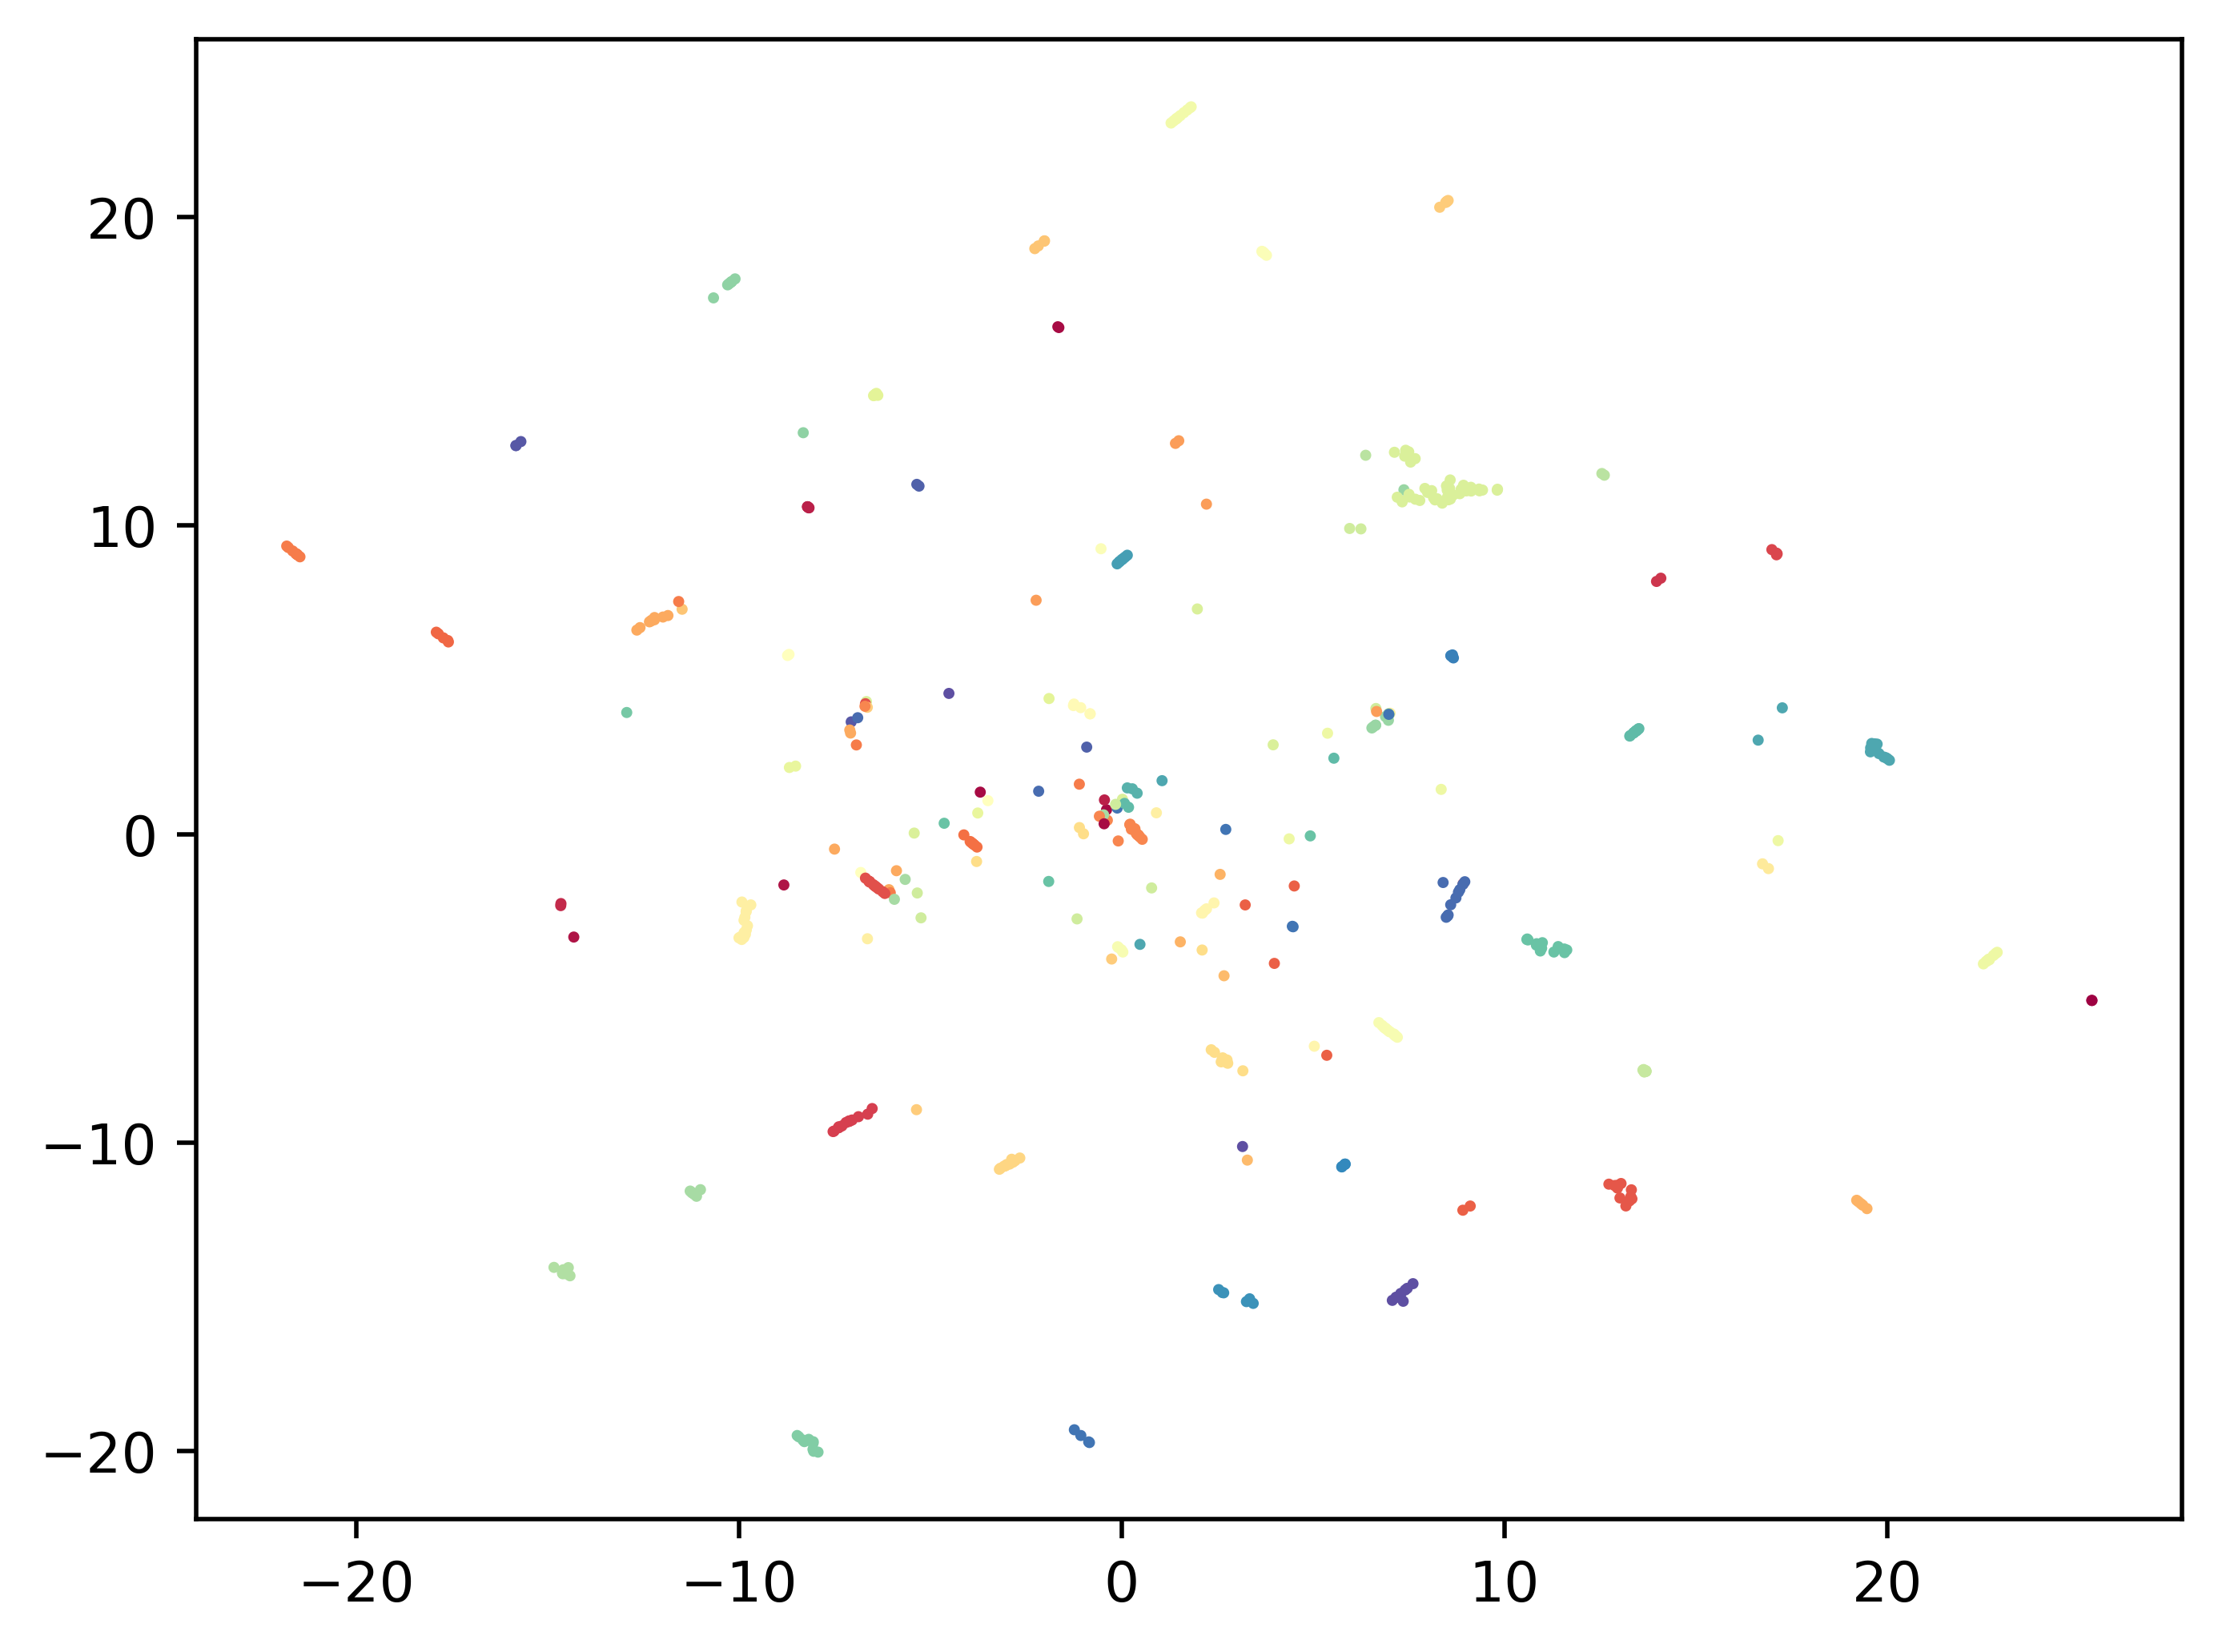

In [44]:
reduce_plot(embs_rot)

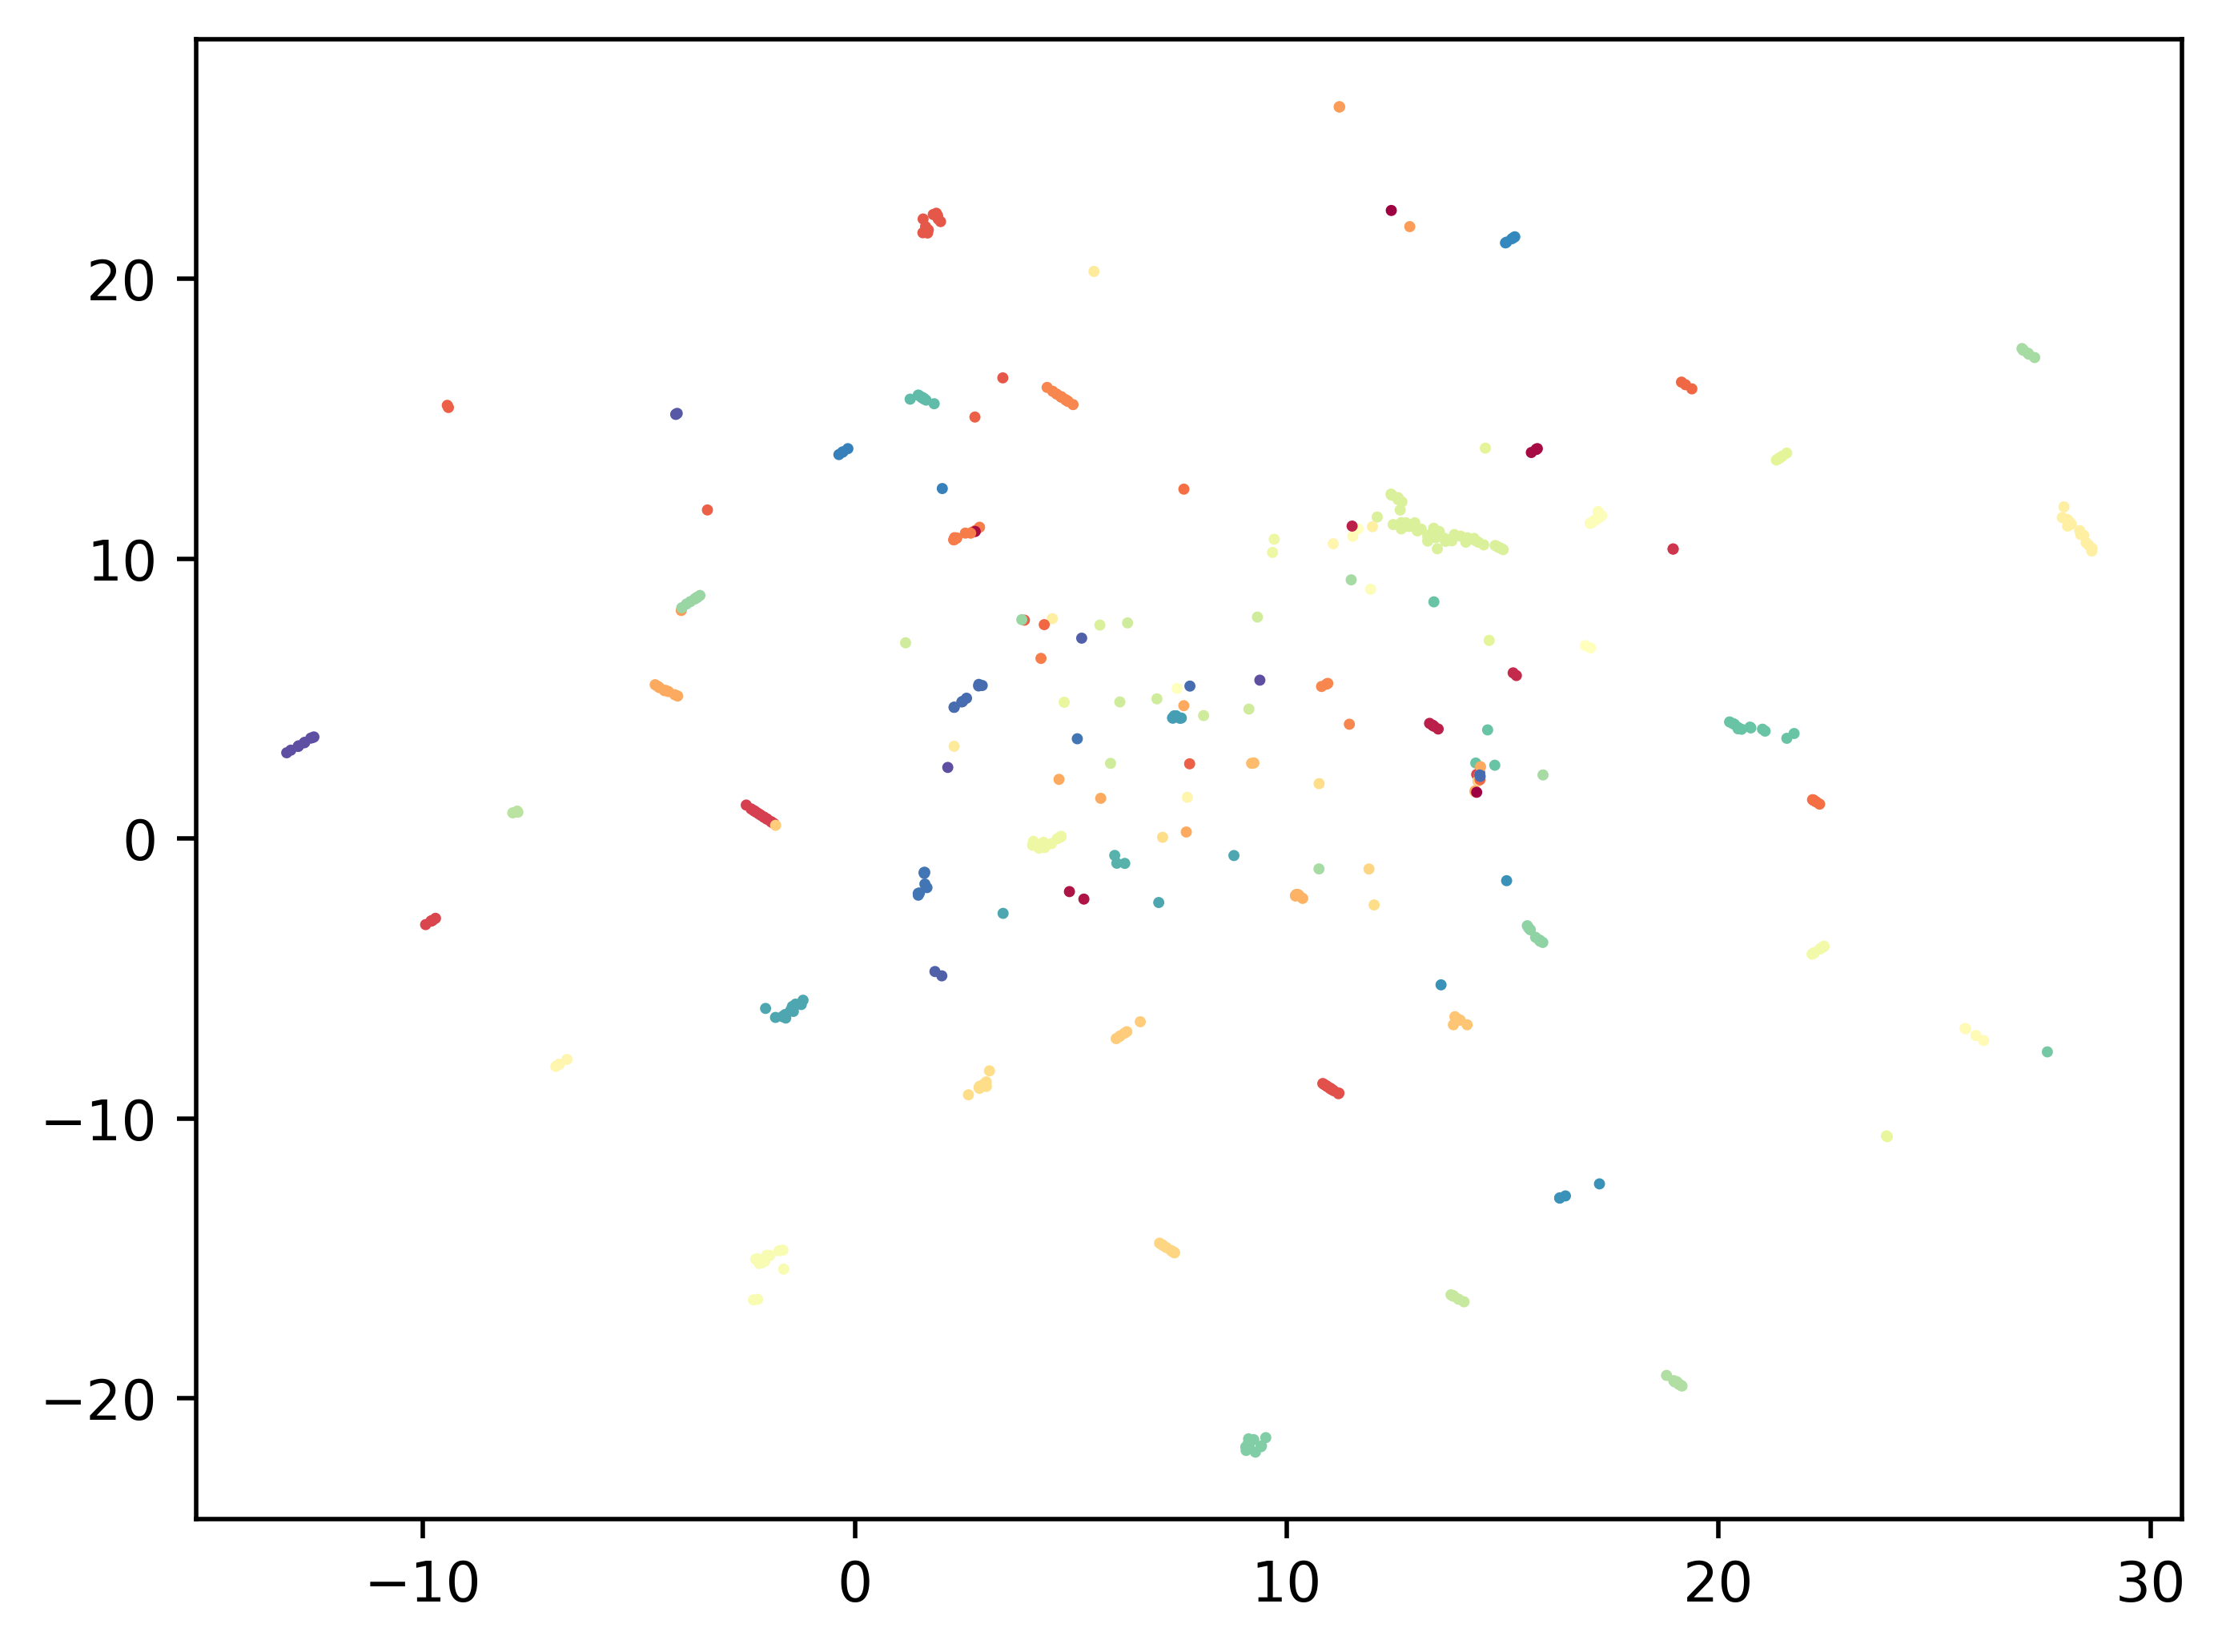

In [46]:
reduce_plot(embs_no)